Loading the dataset
Dataset Loaded

Number of unique values per column:
time                             6165
alarmtimer_alarmtimer_cancel        1
alarmtimer_alarmtimer_fired         1
alarmtimer_alarmtimer_start         1
alarmtimer_alarmtimer_suspend       1
                                 ... 
State                               2
Attack                             18
Scenario                            4
Label                               2
interface                           5
Length: 911, dtype: int64
Number of columns in the dataset: 911
Number of rows in the dataset: 6166
Number of duplicate rows: 0
Number of rows with missing values: 0
Number of columns with a single unique value: 685
Categorical columns:
Index(['State', 'Attack', 'Scenario', 'Label', 'interface'], dtype='object')

Column 'State' unique values and their counts:
State
Charging    3584
idle        2582
Name: count, dtype: int64

Column 'Attack' unique values and their counts:
Attack
none                      

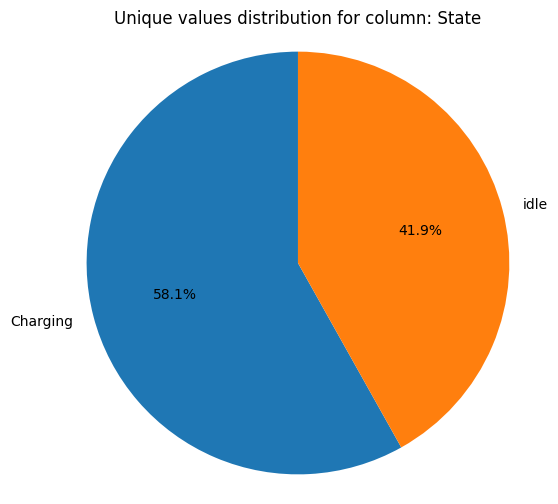

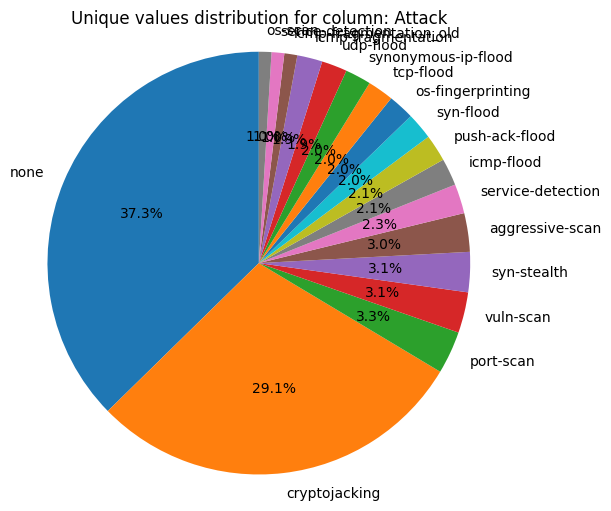

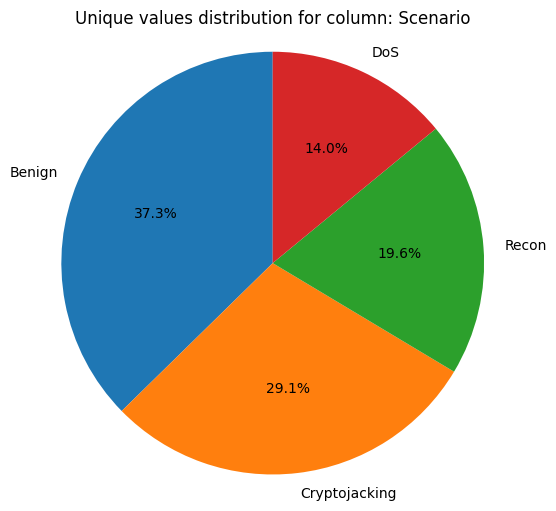

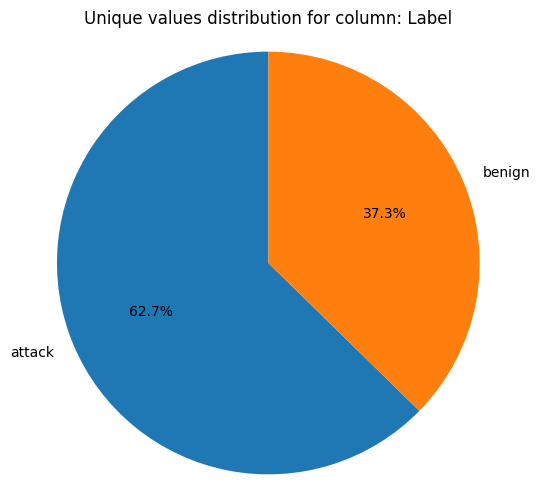

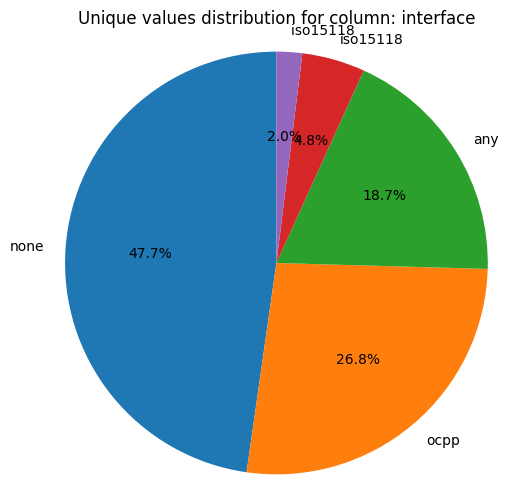


Unique Scenarios: ['Cryptojacking', 'Benign', 'Recon', 'DoS']
Unique Interfaces: ['any', 'none', 'ocpp', 'iso15118 ', 'iso15118']

Counts for all combinations of Scenario and Interface:
Cryptojacking & any: 1151 rows
Cryptojacking & none: 642 rows
Cryptojacking & ocpp: 0 rows
Cryptojacking & iso15118 : 0 rows
Cryptojacking & iso15118: 0 rows
Benign & any: 0 rows
Benign & none: 2302 rows
Benign & ocpp: 0 rows
Benign & iso15118 : 0 rows
Benign & iso15118: 0 rows
Recon & any: 0 rows
Recon & none: 0 rows
Recon & ocpp: 788 rows
Recon & iso15118 : 121 rows
Recon & iso15118: 297 rows
DoS & any: 0 rows
DoS & none: 0 rows
DoS & ocpp: 865 rows
DoS & iso15118 : 0 rows
DoS & iso15118: 0 rows


In [6]:
# Statistics of the dataset
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dataset
print("Loading the dataset")
data = pd.read_csv("Kernel_Events_1.csv")
print("Dataset Loaded")

# 2. Unique values per header
print("\nNumber of unique values per column:")
print(data.nunique())

# 3. Display the number of columns
print("Number of columns in the dataset:", len(data.columns))

# 4. Display the number of rows
print("Number of rows in the dataset:", len(data))

# 5. Display the number of duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# 6. Display the number of missing values
print("Number of rows with missing values:", data.isnull().any(axis=1).sum())

# 7. Display the number of columns with a single unique value
single_unique_value_columns = data.nunique() == 1
print("Number of columns with a single unique value:", single_unique_value_columns.sum())

# 8. Display the headers of the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)

# 9. Display the unique values of each categorical columns and their count
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\nColumn '{col}' unique values and their counts:")
    print(data[col].value_counts())



# 10. Plot circle graphs of the unique values of the categorical columns
# Loop through categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    # Get value counts and percentage
    value_counts = data[col].value_counts()
    percentages = data[col].value_counts(normalize=True) * 100

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Unique values distribution for column: {col}')
    plt.axis('equal') 
    plt.show()

# 11. Display the count of all combinations of the unique values of Scenario and interface
unique_scenarios = list(data['Scenario'].unique())
print("\nUnique Scenarios:", unique_scenarios)

# Get unique values from 'Interface' and store in a list
unique_interfaces = list(data['interface'].unique())
print("Unique Interfaces:", unique_interfaces)
    
print("\nCounts for all combinations of Scenario and Interface:")
for scenario in unique_scenarios:
    for interface in unique_interfaces:
        # Count the number of rows where both conditions are met
        count = len(data[(data['Scenario'] == scenario) & (data['interface'] == interface)])
        print(f"{scenario} & {interface}: {count} rows")

Dropped 685 columns with a single unique value.
Number of columns in the dataset: 226
Dropped columns: ['time', 'Attack', 'interface']
Number of columns in the dataset: 223

Encoding for column 'State':
'Charging' -> 0 (count: 3584)
'idle' -> 1 (count: 2582)

Encoding for column 'Label':
'attack' -> 0 (count: 3864)
'benign' -> 1 (count: 2302)

Encoding for column 'Scenario':
'Benign' -> 0 (count: 2302)
'Cryptojacking' -> 1 (count: 1793)
'DoS' -> 2 (count: 865)
'Recon' -> 3 (count: 1206)

Final value counts:

Column 'State':
State
0    2319
1    2284
Name: count, dtype: int64

Column 'Label':
Label
1    2302
0    2301
Name: count, dtype: int64

Column 'Scenario':
Scenario
0    2302
1     767
2     767
3     767
Name: count, dtype: int64


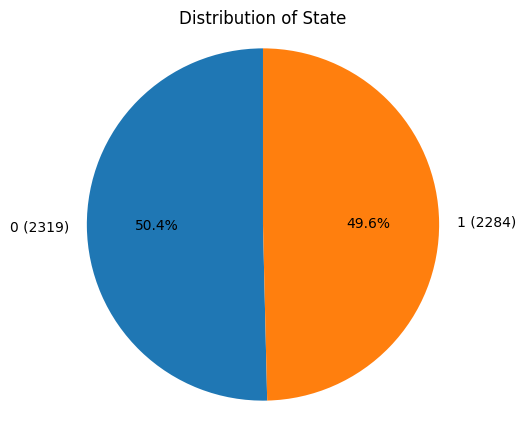

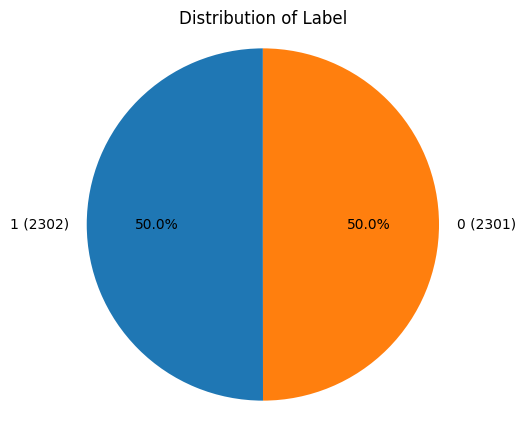

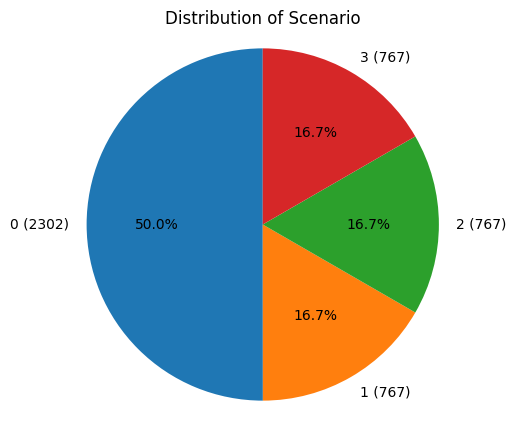


Number of columns with correlation >= 0.65 with 'Label' (excluding 'Scenario' and 'State'): 10
cache-references   -0.662927
inst_spec          -0.653332
l1d_cache          -0.666293
l1d_cache_rd       -0.662271
L1-dcache-loads    -0.663906
l1i_cache          -0.678088
L1-icache-loads    -0.678643
ld_spec            -0.650655
mem_access         -0.665416
mem_access_rd      -0.661060
Name: Label, dtype: float64

Number of columns with correlation >= 0.65 with 'Scenario' (excluding 'Label' and 'State'): 0
Series([], Name: Scenario, dtype: float64)

Correlation between 'State' and 'Label': 0.0076
Correlation between 'State' and 'Scenario': -0.0066
Columns dropped: 10
Remaining columns after dropping: 213
Training set - Scenario distribution:
Scenario
0    1482
1     492
2     490
3     480
Name: count, dtype: int64

Testing set - Scenario distribution:
Scenario
0    359
3    137
2    122
1    119
Name: count, dtype: int64

Training set - State distribution:
State
0    1483
1    1461
Name:

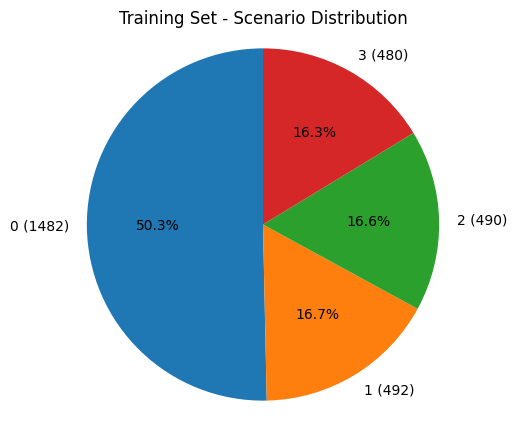

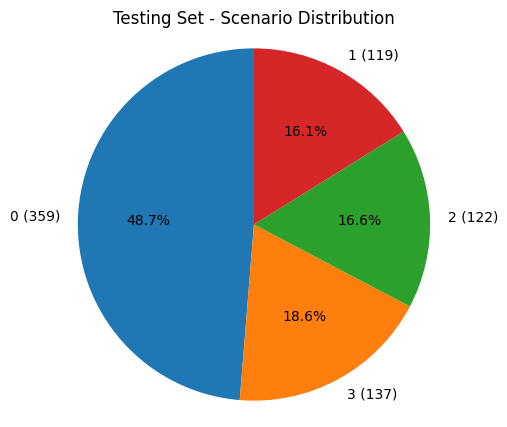


Training set - State distribution:
State
0    1483
1    1461
Name: count, dtype: int64

Testing set - State distribution:
State
0    371
1    366
Name: count, dtype: int64


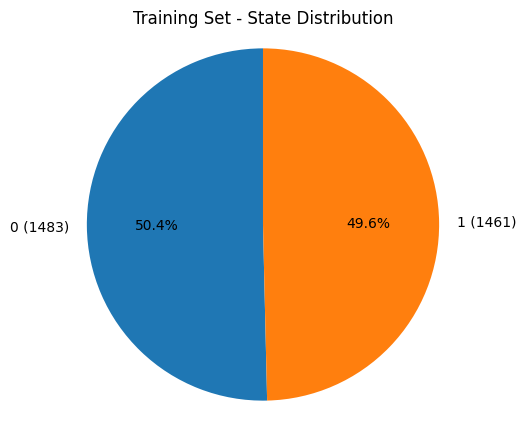

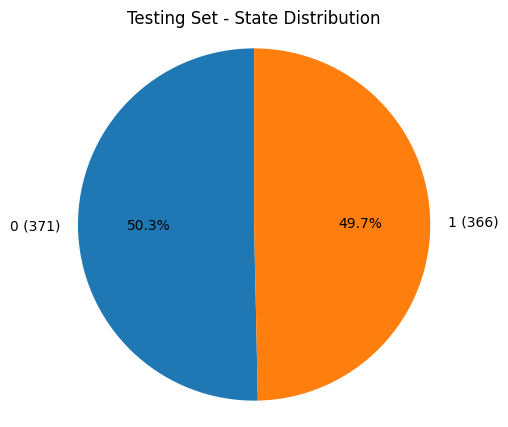


Training set - Label distribution:
Label
1    1482
0    1462
Name: count, dtype: int64

Testing set - Label distribution:
Label
0    378
1    359
Name: count, dtype: int64


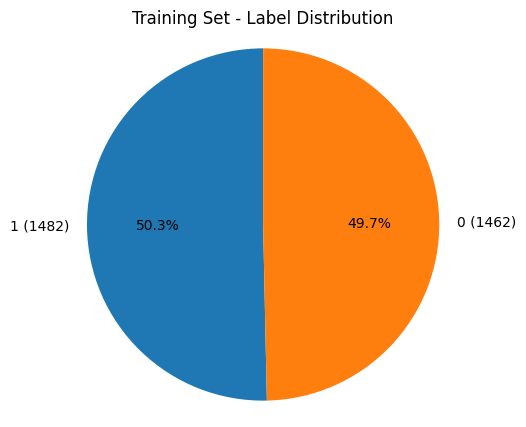

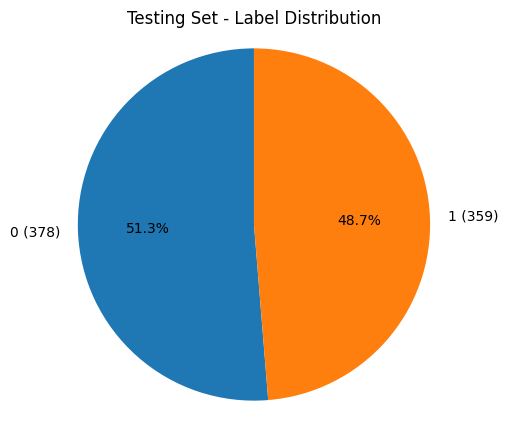

Scenario dropped successfully


In [7]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder

# 1. Drop all columns with a single unique value
single_unique_cols = data.columns[data.nunique() == 1]
data = data.drop(columns=single_unique_cols)
print(f"Dropped {len(single_unique_cols)} columns with a single unique value.")

# 2. Display the number of columns
print("Number of columns in the dataset:", len(data.columns))

# 3. Drop 'time', 'Attack' and 'interface'
columns_to_drop = ['time', 'Attack', 'interface']
data = data.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")
print("Number of columns in the dataset:", len(data.columns))

# 4. Encode 'State', 'Label' and 'Scenario'
encoded_data = data.copy()
encoders = {}
columns_to_encode = ['State', 'Label', 'Scenario']

for col in columns_to_encode:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    encoders[col] = le 
    value_counts = data[col].value_counts()
    print(f"\nEncoding for column '{col}':")
    for original, encoded in zip(le.classes_, le.transform(le.classes_)):
        count = value_counts[original]
        print(f"'{original}' -> {encoded} (count: {count})")


# 5. Balancing the dataset
balanced_data = encoded_data.copy()

# a. Separate benign and attack data
benign_data = balanced_data[balanced_data['Label'] == 1]
attack_data = balanced_data[balanced_data['Label'] == 0]

# b. Determine number of benign rows to keep (50%)
total_target_rows = min(len(benign_data), len(attack_data)) * 2
benign_target = total_target_rows // 2
attack_target = total_target_rows // 2

# Downsample benign to target
benign_sample = benign_data.sample(n=benign_target, random_state=42)

# c. Split attack data by Scenario (excluding 'Benign')
attack_scenarios = attack_data['Scenario'].unique()
attack_scenarios = [s for s in attack_scenarios if s != 0]  # 0 is Benign

# Equal number of rows from each scenario
attack_per_scenario = attack_target // len(attack_scenarios)

attack_samples = []
for scenario in attack_scenarios:
    scenario_data = attack_data[attack_data['Scenario'] == scenario]
    
    # Try to balance State within each scenario group
    state_0 = scenario_data[scenario_data['State'] == 0]  # Charging
    state_1 = scenario_data[scenario_data['State'] == 1]  # idle

    half = attack_per_scenario // 2
    part_0 = state_0.sample(n=min(half, len(state_0)), random_state=42)
    part_1 = state_1.sample(n=min(attack_per_scenario - len(part_0), len(state_1)), random_state=42)
    
    combined = pd.concat([part_0, part_1])
    
    # If still under target, fill remaining from either group
    remaining = attack_per_scenario - len(combined)
    if remaining > 0:
        extra = scenario_data.drop(combined.index).sample(n=remaining, random_state=42)
        combined = pd.concat([combined, extra])
    
    attack_samples.append(combined)

# Concatenate attack data from all scenarios
final_attack_data = pd.concat(attack_samples)

state_0 = benign_sample[benign_sample['State'] == 0]  # Charging
state_1 = benign_sample[benign_sample['State'] == 1]  # idle

half = benign_target // 2
part_0 = state_0.sample(n=min(half, len(state_0)), random_state=42)
part_1 = state_1.sample(n=min(benign_target - len(part_0), len(state_1)), random_state=42)

benign_balanced = pd.concat([part_0, part_1])

remaining = benign_target - len(benign_balanced)
if remaining > 0:
    extra = benign_sample.drop(benign_balanced.index).sample(n=remaining, random_state=42)
    benign_balanced = pd.concat([benign_balanced, extra])

# Combine final data
final_data = pd.concat([benign_balanced, final_attack_data]).sample(frac=1, random_state=42).reset_index(drop=True)

# Display value counts
print("\nFinal value counts:")

for col in ['State', 'Label', 'Scenario']:
    print(f"\nColumn '{col}':")
    print(final_data[col].value_counts())

# Plot pie charts
for col in ['State', 'Label', 'Scenario']:
    plt.figure(figsize=(5, 5))
    value_counts = final_data[col].value_counts()
    labels = [f'{label} ({count})' for label, count in zip(value_counts.index, value_counts)]
    plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')
    plt.show()

# 6. Drop highly correlated columns (0.65)
correlation_matrix = final_data.corr()

# a. Columns correlated (>= 0.65) with 'Label', excluding 'Scenario' and 'State'
label_corr = correlation_matrix['Label'].drop(['Label', 'Scenario', 'State'])
high_corr_label = label_corr[abs(label_corr) >= 0.65]
print(f"\nNumber of columns with correlation >= 0.65 with 'Label' (excluding 'Scenario' and 'State'): {len(high_corr_label)}")
print(high_corr_label)

# b. Columns correlated (>= 0.65) with 'Scenario', excluding 'Label' and 'State'
scenario_corr = correlation_matrix['Scenario'].drop(['Scenario', 'Label', 'State'])
high_corr_scenario = scenario_corr[abs(scenario_corr) >= 0.65]
print(f"\nNumber of columns with correlation >= 0.65 with 'Scenario' (excluding 'Label' and 'State'): {len(high_corr_scenario)}")
print(high_corr_scenario)

# c. Correlation of 'State' with 'Label'
state_label_corr = correlation_matrix.loc['State', 'Label']
print(f"\nCorrelation between 'State' and 'Label': {state_label_corr:.4f}")

# d. Correlation of 'State' with 'Scenario'
state_scenario_corr = correlation_matrix.loc['State', 'Scenario']
print(f"Correlation between 'State' and 'Scenario': {state_scenario_corr:.4f}")

# e. Combine the columns to drop
columns_to_drop = high_corr_label.index.union(high_corr_scenario.index)

# f. Drop the columns from final_data
final_data_dropped = final_data.drop(columns=columns_to_drop)

# g. Display the result
print(f"Columns dropped: {len(columns_to_drop)}")
print(f"Remaining columns after dropping: {len(final_data_dropped.columns)}")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 7. Define features and target
features = final_data.drop(columns=['Label', 'Scenario', 'State'])
target = final_data['Label']

# 8. Identify and scale numerical features
scaler = StandardScaler()
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
features[numerical_features] = scaler.fit_transform(features[numerical_features])

# 9. Split data into training and testing sets (80% training, 20% testing) with balancing

# a. Separate benign and attack data
benign_data = final_data[final_data['Label'] == 1]
attack_data = final_data[final_data['Label'] == 0]

# b. Get unique attack scenarios (excluding 'Benign')
attack_scenarios = attack_data['Scenario'].unique()
attack_scenarios = [s for s in attack_scenarios if s != 0]  # 0 is 'Benign'

# c. Split data with balanced classes
train_benign, test_benign = train_test_split(benign_data, test_size=0.2, random_state=42, stratify=benign_data['State'])
train_attack, test_attack = train_test_split(attack_data, test_size=0.2, random_state=42, stratify=attack_data['State'])

# d. Now balance the data to ensure both training and testing have equal number of benign and attack samples
train_data = pd.concat([train_benign, train_attack])
test_data = pd.concat([test_benign, test_attack])

# e. Further balancing: ensure 80% of idle and 80% of charging in training set and the remaining in test set
train_idle = train_data[train_data['State'] == 1]
train_charging = train_data[train_data['State'] == 0]

# f. Select 80% for training and 20% for testing
train_idle_final, test_idle = train_test_split(train_idle, test_size=0.2, random_state=42)
train_charging_final, test_charging = train_test_split(train_charging, test_size=0.2, random_state=42)

# g. Combine balanced idle and charging data into training and testing sets
train_data_final = pd.concat([train_idle_final, train_charging_final])
test_data_final = pd.concat([test_idle, test_charging])

# h. Shuffle the data
train_data_final = train_data_final.sample(frac=1, random_state=42).reset_index(drop=True)
test_data_final = test_data_final.sample(frac=1, random_state=42).reset_index(drop=True)

# i. Display unique values of 'Scenario' and their count in both training and testing sets
print("Training set - Scenario distribution:")
print(train_data_final['Scenario'].value_counts())
print("\nTesting set - Scenario distribution:")
print(test_data_final['Scenario'].value_counts())

# j. Display unique values of 'State' and their count in both training and testing sets
print("\nTraining set - State distribution:")
print(train_data_final['State'].value_counts())
print("\nTesting set - State distribution:")
print(test_data_final['State'].value_counts())

# k. Function to plot pie charts
def plot_pie_chart(data, column, title):
    value_counts = data[column].value_counts()
    labels = [f'{label} ({count})' for label, count in zip(value_counts.index, value_counts)]
    plt.figure(figsize=(5, 5))
    plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# l. Display unique values of 'Scenario' and their count in both training and testing sets
print("Training set - Scenario distribution:")
print(train_data_final['Scenario'].value_counts())
print("\nTesting set - Scenario distribution:")
print(test_data_final['Scenario'].value_counts())

# m. Plot pie charts for Scenario in both training and testing sets
plot_pie_chart(train_data_final, 'Scenario', 'Training Set - Scenario Distribution')
plot_pie_chart(test_data_final, 'Scenario', 'Testing Set - Scenario Distribution')

# n. Display unique values of 'State' and their count in both training and testing sets
print("\nTraining set - State distribution:")
print(train_data_final['State'].value_counts())
print("\nTesting set - State distribution:")
print(test_data_final['State'].value_counts())

# o. Plot pie charts for State in both training and testing sets
plot_pie_chart(train_data_final, 'State', 'Training Set - State Distribution')
plot_pie_chart(test_data_final, 'State', 'Testing Set - State Distribution')

# p. Plot pie charts for Label in both training and testing sets
print("\nTraining set - Label distribution:")
print(train_data_final['Label'].value_counts())
print("\nTesting set - Label distribution:")
print(test_data_final['Label'].value_counts())

plot_pie_chart(train_data_final, 'Label', 'Training Set - Label Distribution')
plot_pie_chart(test_data_final, 'Label', 'Testing Set - Label Distribution')

# 10. Drop 'Scenario'
final_data_dropped_scenario = final_data.drop(columns=['Scenario'])
print('Scenario dropped successfully')

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into features and target
features = final_data.drop(columns=['Label', 'Scenario', 'State'])
target = final_data['Label']

# Scale the features (only numerical columns)
scaler = StandardScaler()
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
features[numerical_features] = scaler.fit_transform(features[numerical_features])

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Initialize the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions using the models
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Evaluate the models using accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print the results
print(f"Logistic Regression Accuracy: {logreg_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")


Logistic Regression Accuracy: 99.57%
Random Forest Accuracy: 99.57%
SVM Accuracy: 99.57%


In [9]:
import pandas as pd
from scipy.stats import ttest_ind

def compare_attack_benign(df, feature_columns, label_column='Label', benign_label=1, attack_label=0, alpha=0.05):
    """
    Performs independent samples t-tests for each feature to compare the
    means of 'benign' and 'attack' samples.

    Args:
        df (pd.DataFrame): The dataframe containing the features and the label.
        feature_columns (list): A list of column names to use as features.
        label_column (str): The name of the column containing the labels.
        benign_label (int or str): The value representing the benign class.
        attack_label (int or str): The value representing the attack class.
        alpha (float): Significance level for the t-test.

    Returns:
        pd.DataFrame: A DataFrame containing the t-statistic, p-value, and
                      a boolean indicating if the difference is statistically
                      significant for each feature.
    """
    results = []
    benign_data = df[df[label_column] == benign_label]
    attack_data = df[df[label_column] == attack_label]

    if benign_data.empty or attack_data.empty:
        print("Warning: One or both of the benign/attack datasets are empty. Cannot perform comparison.")
        return pd.DataFrame()

    for feature in feature_columns:
        if feature not in df.columns:
            print(f"Warning: Feature '{feature}' not found in the DataFrame.")
            continue

        benign_values = benign_data[feature].dropna()
        attack_values = attack_data[feature].dropna()

        if len(benign_values) < 2 or len(attack_values) < 2:
            print(f"Warning: Not enough data points for feature '{feature}' in one or both classes to perform t-test.")
            results.append({'feature': feature, 't_statistic': None, 'p_value': None, 'significant_difference': False})
            continue

        try:
            t_statistic, p_value = ttest_ind(benign_values, attack_values)
            significant_difference = p_value < alpha
            results.append({'feature': feature, 't_statistic': t_statistic, 'p_value': p_value, 'significant_difference': significant_difference})
        except Exception as e:
            print(f"Error performing t-test for feature '{feature}': {e}")
            results.append({'feature': feature, 't_statistic': None, 'p_value': None, 'significant_difference': False})

    return pd.DataFrame(results)

if 'final_data' in locals() and 'feature_columns' in locals():
    print("\n--- Statistical Test for Attack vs. Benign Difference ---")
    comparison_results = compare_attack_benign(final_data.copy(), feature_columns)
    print("\nResults of t-tests comparing Attack and Benign samples for each feature:")
    print(comparison_results)

    significant_features = comparison_results[comparison_results['significant_difference']]
    print(f"\nNumber of features with a statistically significant difference (alpha={0.05}): {len(significant_features)}")
    if not significant_features.empty:
        print("\nFeatures with statistically significant differences:")
        print(significant_features[['feature', 'p_value']].sort_values(by='p_value'))
    else:
        print("\nNo features found with a statistically significant difference based on the t-test.")
else:
    print("\nError: 'final_data' or 'feature_columns' not found. Run the previous parts of the script first.")


--- Statistical Test for Attack vs. Benign Difference ---

Results of t-tests comparing Attack and Benign samples for each feature:
                                   feature  t_statistic        p_value  \
0                                 ase_spec   -33.734096  4.094092e-223   
1                block_block_bio_backmerge    -2.776431   5.518169e-03   
2                    block_block_bio_queue    -3.404005   6.697312e-04   
3                    block_block_bio_remap    -3.379151   7.331469e-04   
4                 block_block_dirty_buffer    -1.681926   9.265105e-02   
..                                     ...          ...            ...   
215                               vfp_spec   -25.971626  6.851255e-139   
216        writeback_writeback_dirty_inode    -1.823560   6.828353e-02   
217  writeback_writeback_dirty_inode_start    -1.823560   6.828353e-02   
218         writeback_writeback_dirty_page    -1.689686   9.115574e-02   
219   writeback_writeback_mark_inode_dirty    -2.0743